<a href="https://colab.research.google.com/github/heritiana-aimsammi-sn2022/test-live-coding/blob/master/Heritiana_Daniel_Andriasolofo_LogRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Logistic Regression Implementation

# Instructions:
1. Save a copy of this notebook in your drive;
2. Name it by: `Your_fullname_LogRegression.ipynb`
3. Close the original notebook
4. Start typing your codes.

`Note:` Discuss with your neighbors.

# Part 1: Data preparation

## Import Dataset Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Question 0: Import the dataset Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
##### WRITE YOUR CODE HERE #####
path= "/content/drive/MyDrive/Colab Notebooks/practical_seeion/log_reg_live_session/diabetes.csv"
data= pd.read_csv(path)
#### END CODE ####

Question 1: Print the first five rows of the Dataset

In [4]:
##### WRITE YOUR CODE HERE #####
data.head(5)
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Question 2: Check the types of your variables/features

In [5]:
##### WRITE YOUR CODE HERE #####
data.dtypes
#### END CODE ####

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Question 3: Describe your dataset

In [6]:
##### WRITE YOUR CODE HERE #####
data.describe()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Question 4: write a function that scale your features.
`Hint:` $x'= \dfrac{x-\mu}{\sigma}$ 
where $\mu$ is the mean and $\sigma$ the standard deviation of $x$.

In [7]:
##### WRITE YOUR CODE HERE #####

def scale(v):
    return (v - v.mean())/v.std()

#### END CODE ####

Question 5: Scale your features, except the target. 

In [8]:
##### WRITE YOUR CODE HERE #####
scaled_data = data.copy()
scaled_data.loc[:,data.columns != "Outcome"] = data.loc[:,data.columns != "Outcome"].apply(scale, axis = "columns")
scaled_data.head()
#### END CODE #### 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.752134,2.122518,0.583972,-0.165057,-0.873598,-0.193399,-0.860905,0.138603,1
1,-0.915896,1.749095,1.146299,-0.027566,-0.947623,-0.103709,-0.936487,0.035886,0
2,-0.495901,2.315191,0.403649,-0.624408,-0.624408,-0.250131,-0.613613,-0.110380,1
3,-1.045018,1.295962,0.684115,-0.459773,1.428972,-0.324103,-1.067177,-0.512977,0
4,-0.931170,1.295247,-0.281122,-0.362378,1.799034,-0.230743,-0.893988,-0.394880,1


In [9]:
scaled_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.752134,2.122518,0.583972,-0.165057,-0.873598,-0.193399,-0.860905,0.138603,1
1,-0.915896,1.749095,1.146299,-0.027566,-0.947623,-0.103709,-0.936487,0.035886,0
2,-0.495901,2.315191,0.403649,-0.624408,-0.624408,-0.250131,-0.613613,-0.110380,1
3,-1.045018,1.295962,0.684115,-0.459773,1.428972,-0.324103,-1.067177,-0.512977,0
4,-0.931170,1.295247,-0.281122,-0.362378,1.799034,-0.230743,-0.893988,-0.394880,1


Question 6: Write a function that split your (x,y) to (x_train, y_train) and (x_test, y_test).
`Note:` This function must return an arrays.

In [10]:
##### WRITE YOUR CODE HERE #####
def split_data(df, train_percent= 0.8):
  np.random.seed(2)
  perm = np.random.permutation(df.index)

  n= len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  x_train, x_test, y_train, y_test= train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]
  return x_train.values, x_test.values, y_train.values, y_test.values
#### END CODE ####

In [11]:
x_train, x_test, y_train, y_test= split_data(scaled_data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

# Part 2: Logistic Regression without Regularization.

## Recaps:
1. Logistic/sigmoid function of $z$:
\begin{equation}
g(z)= \dfrac{1}{1+ exp(-z)}
\end{equation}
where $z= x^t \theta$ and $x, y \in \mathbb{R}^d$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
dg(z)= g(z)(1-g(z))
\end{equation}
3. Cross-entropy loss:
\begin{equation}
l(\theta)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}
where $y_{true}= g(z)$, $z= x^t \theta$ and $y_{true}$ is the ground-truth for a given $x$.

4. Derivative of Cross-entropy loss with respective to $\theta$:
\begin{equation}
dl(\theta)= -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{ped} \right)
\end{equation}
5. Apply Batch gradient descent to update $\theta$.

Question: Create a class called LogReg. See the description in the below cells.


In [107]:
class logistic_regression:
  def __init__(self, num_iters= 100, threshold= 0.5, tolerance= 1e-10, lr= 1e-6):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters = num_iters
    self.threshold = threshold
    self.tolerance = tolerance
    self.learning_rate = lr
    self.theta = None
    self.cost_history_train = []
    self.cost_history_test = []
    #### END CODE ####

  def add_ones(self, x):
    ##### WRITE YOUR CODE HERE #####
    x_new = np.hstack([np.ones((x.shape[0],1)), x])
    return x_new
    #### END CODE ####

  def sigmoid(self, x):
    ##### WRITE YOUR CODE HERE #####
    z = x @ self.theta
    return 1/(1 + np.exp(-z))
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    #n = len(x) # Length of x
    y_pred = self.sigmoid(x)
    Cost = (y_true.T * np.log(y_pred) + (1-y_true).T * np.log(1-y_pred))     
    return -np.mean(Cost)
    #### END CODE ####

  def fit(self, x, y, x_test, y_test):
    ##### WRITE YOUR CODE HERE #####
    x = self.add_ones(x) # Add ones to x
    x_test = self.add_ones(x_test)
    y= y.reshape(-1,1) # reshape y. This is optional, do it if needed
    self.theta = np.zeros((x.shape[1], 1)) # Initialize theta to zeros vector >>> (x.shape[1])
    current_iter = 1
    norm = self.tolerance + 1
    m = x.shape[0]

    while (norm >= self.tolerance and current_iter < self.num_iters):
      theta_old = self.theta.copy() # Get old theta

      # make predictions
      y_pred= self.sigmoid(x) # using sigmoid function 

      # Gradient of cross-entropy
      #   grad= None
      grad= - x.T @ ( y - y_pred) # Reshape, if it is needed
      grad = grad.reshape(-1,1)
      # update rules
      self.theta= theta_old -  self.learning_rate * grad
      # Compute the training loss
      self.cost_history_train.append(self.cross_entropy(x,y))
      self.cost_history_test.append(self.cross_entropy(x_test, y_test))

      # Convergence criteria:
      if current_iter%100 == 0:
        print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y)}')
      norm = np.linalg.norm(theta_old - self.theta)
      current_iter += 1
    #### END CODE ####
  
  def predict(self, x):
    proba= self.predict_proba(x) # Get probability of x
    print(proba.shape)
    result= [1 if p > self.threshold else 0  for p in proba]# Convert proba to 0 or 1. hint: list comprehension
    return  result
  
    
  def predict_proba(self, x):
    x= self.add_ones(x) # Apply add ones to x
    y_pred_prob= self.sigmoid(x) # Predict proba with sigmoid
    return y_pred_prob
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.plot(np.arange(len(self.cost_history_train)), self.cost_history_train)
    plt.plot(np.arange(len(self.cost_history_test)), self.cost_history_test)
    plt.show()
    #### END CODE ####

In [108]:
# Create a model by instanciating the class logistic_regression
model = logistic_regression(num_iters=1000)

In [109]:
%%time
model.fit(x_train, y_train, x_test, y_test)

cost for 100 iteration : 0.6841751483981214
cost for 200 iteration : 0.6767152294603861
cost for 300 iteration : 0.6705130408827485
cost for 400 iteration : 0.6653561460042319
cost for 500 iteration : 0.6610676915867958
cost for 600 iteration : 0.6575007518769977
cost for 700 iteration : 0.6545334167819113
cost for 800 iteration : 0.6520645957444807
cost for 900 iteration : 0.6500104747181848
CPU times: user 2.55 s, sys: 84.2 ms, total: 2.64 s
Wall time: 2.65 s


In [110]:
pred= model.predict(x_test)

(154, 1)


In [111]:
print

<function print>

In [112]:
# Predict Proba
print(model.predict_proba(x_test))

[[0.38770721]
 [0.39187913]
 [0.4183673 ]
 [0.39476899]
 [0.4009064 ]
 [0.42299807]
 [0.40372633]
 [0.42412664]
 [0.39389585]
 [0.39853669]
 [0.3944483 ]
 [0.41967699]
 [0.44057167]
 [0.39598016]
 [0.39559009]
 [0.38817658]
 [0.40013206]
 [0.39637213]
 [0.39818267]
 [0.38371559]
 [0.39666318]
 [0.41454775]
 [0.38948313]
 [0.397871  ]
 [0.38698883]
 [0.39944876]
 [0.39714754]
 [0.39938808]
 [0.42614851]
 [0.43462863]
 [0.42057458]
 [0.41697644]
 [0.38423299]
 [0.39795226]
 [0.39577078]
 [0.39649582]
 [0.40565575]
 [0.39495545]
 [0.38914966]
 [0.39684452]
 [0.38927788]
 [0.40060232]
 [0.41890485]
 [0.39840615]
 [0.39882955]
 [0.39473973]
 [0.42931436]
 [0.39975912]
 [0.40045153]
 [0.38350197]
 [0.39690669]
 [0.39964126]
 [0.39780279]
 [0.39446294]
 [0.44674233]
 [0.40811609]
 [0.40753353]
 [0.41159899]
 [0.39383814]
 [0.40796227]
 [0.40099423]
 [0.39769705]
 [0.41586286]
 [0.40317807]
 [0.39564914]
 [0.39680747]
 [0.42183329]
 [0.41640349]
 [0.42367487]
 [0.41523995]
 [0.39845778]
 [0.39

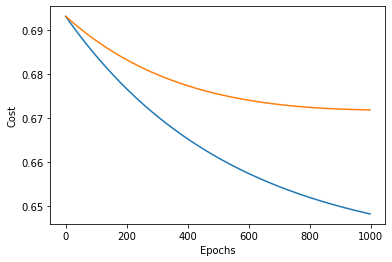

In [113]:
model.plot()

## Push your works to Githup Repo

Setps:
1. Fork the repo: `https://github.com/AMMI-2022/test-live-coding`
2. Clone in your colab;
3. Push
4. Make a pull request

Set your credential

In [ ]:
my_token= ""
my_repository= ""
username= ""
useremail= ""

Clone the repo

In [ ]:
! git clone https://github.com/{username}/{my_repository}.git

In [ ]:
! git remote -v

Copy data to test-live-coding folder

In [ ]:
!cp diabetes.csv /content/test-live-coding

In [ ]:
%cd /content/test-live-coding

In [ ]:
!git status

In [ ]:
!git config user.email useremail
!git config user.name username

In [ ]:
!git add .
!git commit -m "Add my files"

In [ ]:
!git status

In [ ]:
!git push -u origin master --force

# If you cannot push, use:

In [ ]:
!git remote rm origin

In [ ]:
!git remote add origin https://{my_token}@github.com/{username}/{my_repository}.git
!git remote -v

In [ ]:
!git push -u origin master --force

---



---



---

# Assignment

Just follow the class logistic_regression, try to implement Logistic regression with `l1`, `l2` and `l1-l2`. That we call respectively `Lasso (least absolute shrinkage and selection operator)`, `Ridge` and `ElasticNet`.
Given cross-entropy:
\begin{equation}
  l(θ)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}

1. l1-regularization (LASSO):

\begin{equation}
   l(θ) + λ\| \theta\|_1
\end{equation}


2. l2-regularization (Ridge):
\begin{equation}
   l(θ)+ λ\| \theta\|_2
\end{equation}

3. l1-l2-regularization (ElasticNet):
\begin{equation}
  l(θ) + λ_1\| \theta\|_1 + λ_2\| \theta\|_2
\end{equation}

`Note: please use mini-batch as learning algorithm`

In [ ]:
class logistic_regression_l1:
  pass

In [ ]:
class logistic_regression_l2:
  pass

In [ ]:
class logistic_regression_l1_l2:
  pass

# Concepts [Assignment]:
1. Why there is no close form for cross-entropy loss?
2. Why we need cross-entropy loss instead of mse?
3. Why is logistic regression a type of classification technique and not a regression?